In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import rankdata, norm

In [3]:
df = pd.read_csv("Dry_Bean_Dataset new.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
print(df.shape)

(13611, 17)


In [5]:
print(df.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Imbalance data

Imbalanced data occurs when one class in your dataset significantly outnumbers the other. This can pose challenges for machine learning models, as they might be biased towards the majority class.

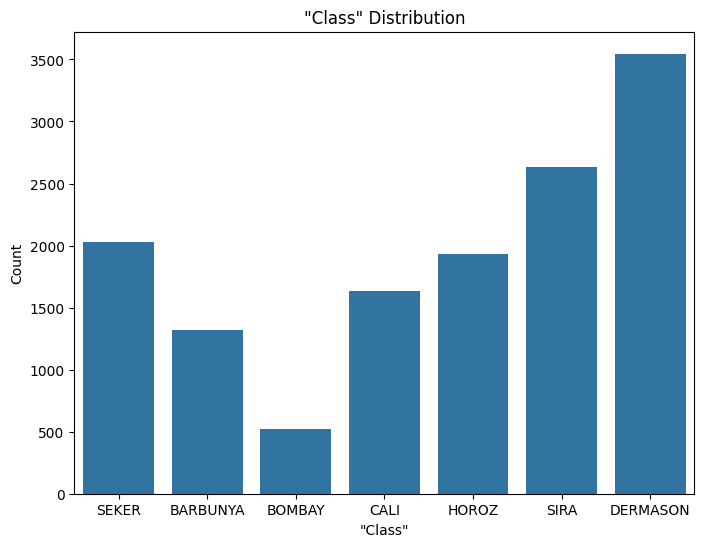

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x="Class",data=df)
plt.title('"Class" Distribution')
plt.xlabel('"Class"')
plt.ylabel('Count')
plt.show()

OverSampling

In [9]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 325.1 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 655.4 kB/s eta 0:00:01
   --------------------------------- ------ 215.0/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from imblearn.over_sampling import RandomOverSampler


# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

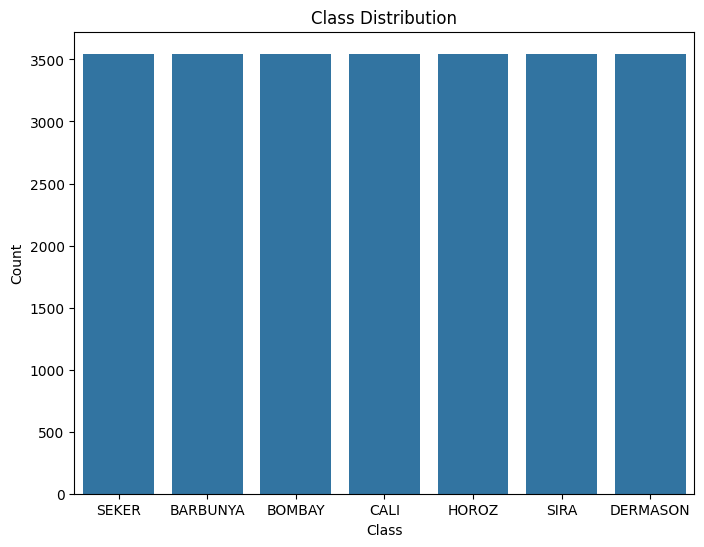

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Class",data=data_resampled)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [12]:
data_resampled.shape

(24822, 17)

In [13]:
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24822 entries, 0 to 24821
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             24822 non-null  int64  
 1   Perimeter        24822 non-null  float64
 2   MajorAxisLength  24822 non-null  float64
 3   MinorAxisLength  24822 non-null  float64
 4   AspectRation     24822 non-null  float64
 5   Eccentricity     24822 non-null  float64
 6   ConvexArea       24822 non-null  int64  
 7   EquivDiameter    24822 non-null  float64
 8   Extent           24822 non-null  float64
 9   Solidity         24822 non-null  float64
 10  roundness        24822 non-null  float64
 11  Compactness      24822 non-null  float64
 12  ShapeFactor1     24822 non-null  float64
 13  ShapeFactor2     24822 non-null  float64
 14  ShapeFactor3     24822 non-null  float64
 15  ShapeFactor4     24822 non-null  float64
 16  Class            24822 non-null  object 
dtypes: float64(1

Univariate Analysis

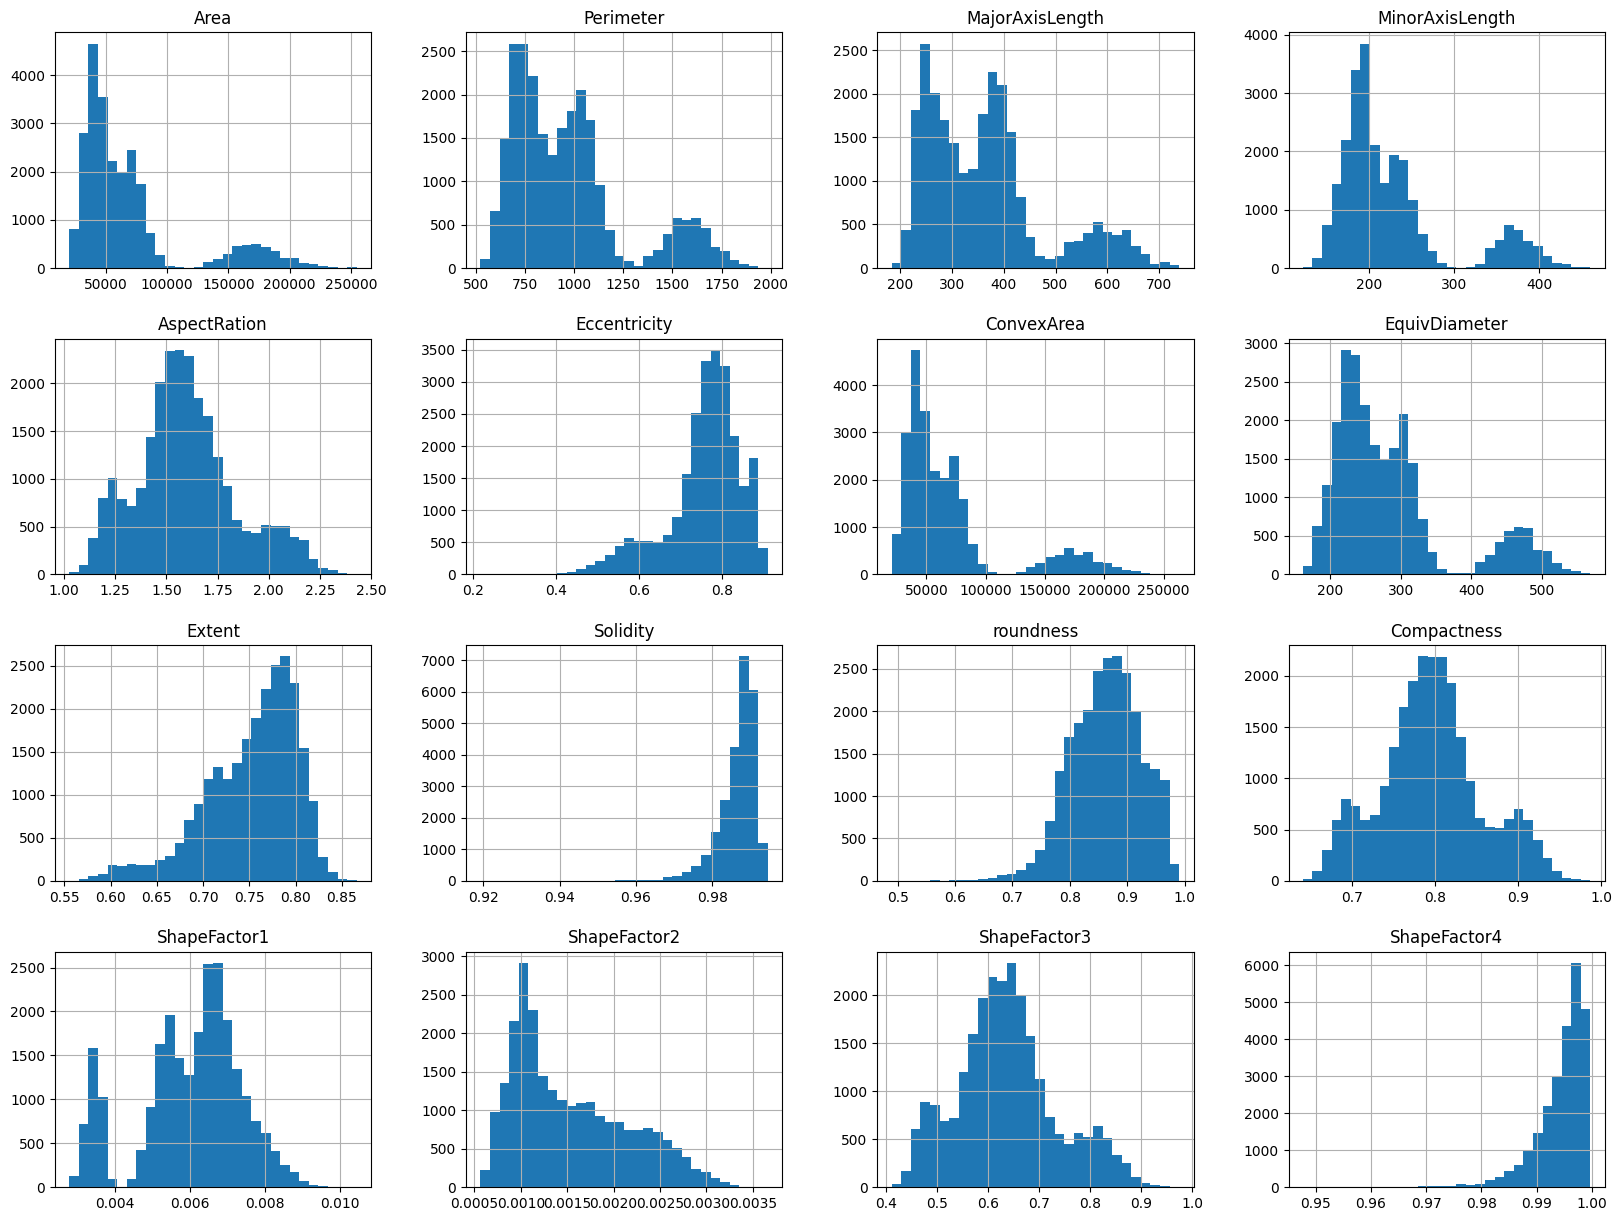

In [26]:
# Numerical variables
data_resampled.hist(bins=30, figsize=(20, 15))
plt.show()

Bivariate Analysis

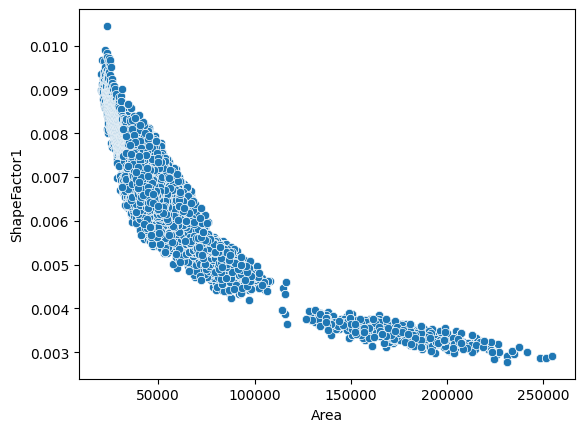

In [27]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='ShapeFactor1', data=data_resampled)
plt.show()

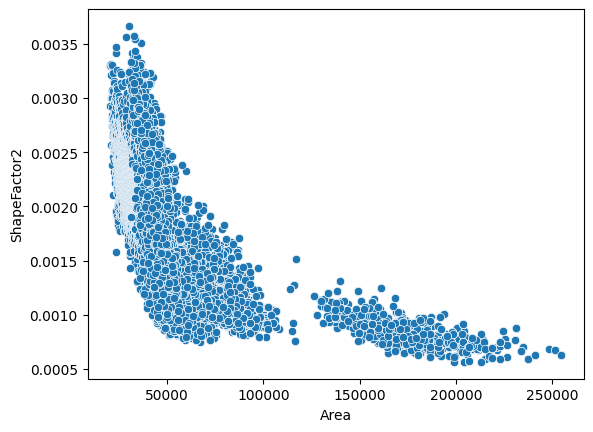

In [28]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='ShapeFactor2', data=data_resampled)
plt.show()

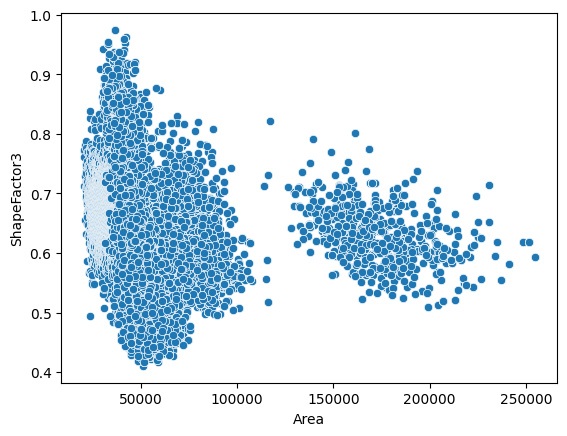

In [29]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='ShapeFactor3', data=data_resampled)
plt.show()

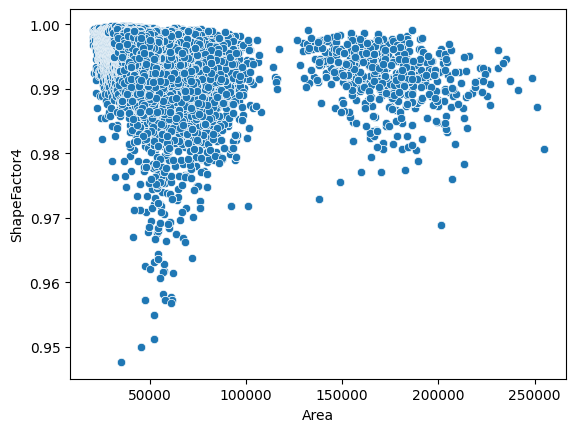

In [30]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='ShapeFactor4', data=data_resampled)
plt.show()

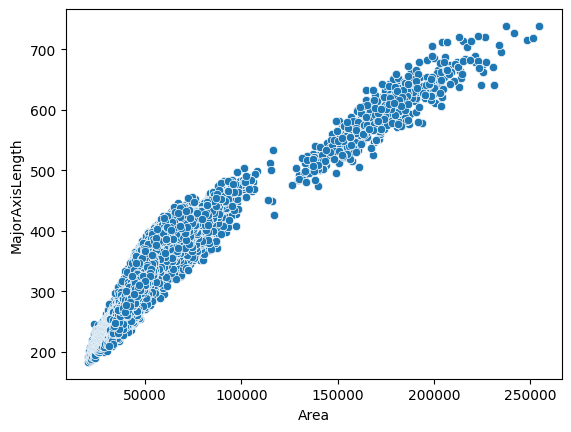

In [31]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='MajorAxisLength', data=data_resampled)
plt.show()

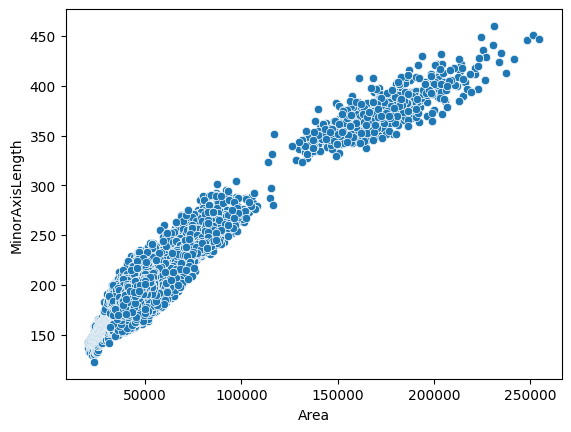

In [32]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='MinorAxisLength', data=data_resampled)
plt.show()

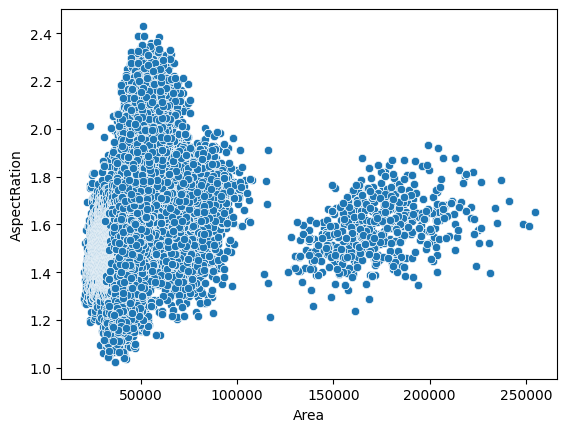

In [33]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='AspectRation', data=data_resampled)
plt.show()

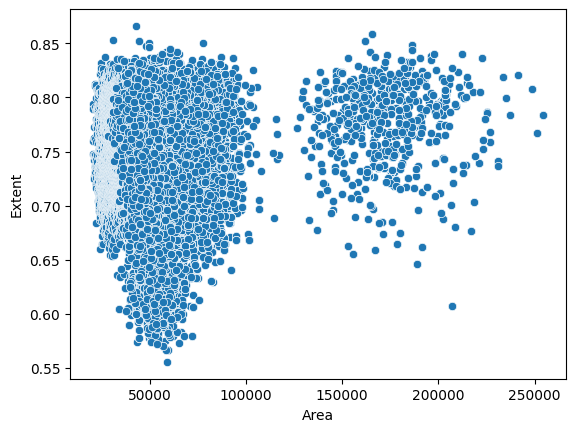

In [34]:
#Numerical vs numerical
sns.scatterplot(x='Area', y='Extent', data=data_resampled)
plt.show()

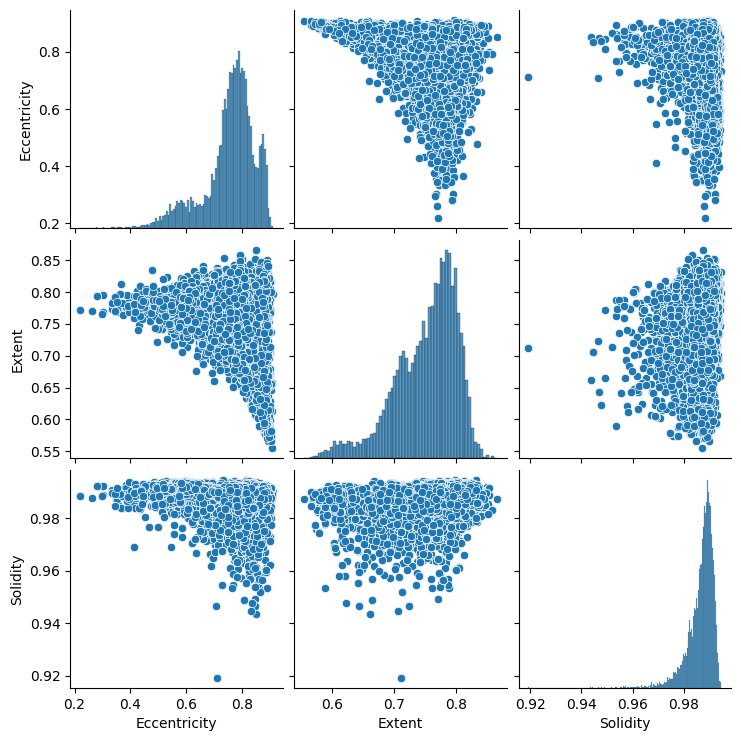

In [35]:
sns.pairplot(data_resampled[['Eccentricity', 'Extent', 'Solidity']])
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'data_resampled' contains both features and the target column 'Class'
# Separate features from the target
X_resampled = data_resampled.drop(columns='Class')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_resampled.columns
vif_data['VIF'] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]

# Display VIF values
print(vif_data)



            Feature           VIF
0              Area  2.905949e+05
1         Perimeter  6.368235e+04
2   MajorAxisLength  9.312157e+05
3   MinorAxisLength  1.095310e+06
4      AspectRation  1.042434e+05
5      Eccentricity  2.409241e+04
6        ConvexArea  2.779668e+05
7     EquivDiameter  4.121516e+06
8            Extent  2.920836e+02
9          Solidity  4.819599e+05
10        roundness  1.945454e+04
11      Compactness  1.663563e+06
12     ShapeFactor1  1.341291e+04
13     ShapeFactor2  7.141257e+03
14     ShapeFactor3  4.033246e+05
15     ShapeFactor4  1.988188e+06


In [10]:
from sklearn.decomposition import PCA

# Standardizing the features before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled_scaled = data_resampled.drop(columns='Class')
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Applying PCA
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_pca = pca.fit_transform(X_resampled_scaled)

# Now X_pca contains reduced uncorrelated features
print(f"Number of components chosen: {pca.n_components_}")
print(pca.n_components_)

Number of components chosen: 4
4


In [38]:
print(pca.n_components_)

4


In [39]:
# Explained variance ratio (amount of variance explained by each principal component)
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:")
print(explained_variance)

Explained variance ratio for each component:
[0.52612278 0.29232879 0.08194021 0.04969055]


In [40]:
# Principal components (loadings of original features onto each component)
components = pd.DataFrame(pca.components_, columns=X_resampled.columns)
print("\nPrincipal components (loadings):")
print(components)


Principal components (loadings):
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  0.298759   0.320941         0.333173         0.270631      0.191111   
1 -0.219124  -0.164639        -0.107460        -0.283889      0.361538   
2  0.047867   0.009194         0.068312        -0.007879      0.188247   
3 -0.047887  -0.057581        -0.023274        -0.070612      0.061155   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.215824    0.299372       0.310375 -0.012122 -0.119036  -0.203703   
1      0.331646   -0.217917      -0.198823 -0.237471 -0.142872  -0.268430   
2      0.176063    0.041075       0.036438  0.088880  0.741939   0.188523   
3      0.109100   -0.047348      -0.047672  0.935282 -0.049476   0.090861   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0    -0.209142     -0.259082     -0.321429     -0.212705     -0.197989  
1    -0.353620      0.277578     -0.132923     -0.349744     -0

In [41]:
# Identifying the contribution of original features to each component
for i, component in enumerate(pca.components_):
    print(f"\nComponent {i+1}:")
    print(pd.Series(component, index=X_resampled.columns).sort_values(ascending=False))


Component 1:
MajorAxisLength    0.333173
Perimeter          0.320941
EquivDiameter      0.310375
ConvexArea         0.299372
Area               0.298759
MinorAxisLength    0.270631
Eccentricity       0.215824
AspectRation       0.191111
Extent            -0.012122
Solidity          -0.119036
ShapeFactor4      -0.197989
roundness         -0.203703
Compactness       -0.209142
ShapeFactor3      -0.212705
ShapeFactor1      -0.259082
ShapeFactor2      -0.321429
dtype: float64

Component 2:
AspectRation       0.361538
Eccentricity       0.331646
ShapeFactor1       0.277578
MajorAxisLength   -0.107460
ShapeFactor4      -0.118638
ShapeFactor2      -0.132923
Solidity          -0.142872
Perimeter         -0.164639
EquivDiameter     -0.198823
ConvexArea        -0.217917
Area              -0.219124
Extent            -0.237471
roundness         -0.268430
MinorAxisLength   -0.283889
ShapeFactor3      -0.349744
Compactness       -0.353620
dtype: float64

Component 3:
Solidity           0.741939
Shap

In [11]:
from sklearn.model_selection import train_test_split

# Create a DataFrame with PCA results and the target variable
df_pca = pd.DataFrame(X_pca)
df_pca['Class'] = data_resampled['Class'].reset_index(drop=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop('Class', axis=1), df_pca['Class'], test_size=0.3, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and test each model
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 50)


Logistic Regression Accuracy: 0.8934
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.83      0.74      0.78      1086
      BOMBAY       1.00      1.00      1.00      1072
        CALI       0.78      0.85      0.81      1069
    DERMASON       0.90      0.90      0.90      1066
       HOROZ       0.95      0.95      0.95      1052
       SEKER       0.95      0.95      0.95      1017
        SIRA       0.84      0.87      0.86      1085

    accuracy                           0.89      7447
   macro avg       0.89      0.89      0.89      7447
weighted avg       0.89      0.89      0.89      7447

--------------------------------------------------
K-Nearest Neighbors Accuracy: 0.9067
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.84      0.84      0.84      1086
      BOMBAY       1.00      1.00      1.00      1072
        CALI       0.85      

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and test each model
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    
    print(f'{name}')
    print(f'Accuracy: {acc:.4f}')
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('-' * 50)


Logistic Regression
Accuracy: 0.8934
Precision: {'BARBUNYA': 0.8744588744588745, 'BOMBAY': 1.0, 'CALI': 0.7922624053826746, 'DERMASON': 0.9020522388059702, 'HOROZ': 0.9615384615384616, 'SEKER': 0.956820412168793, 'SIRA': 0.8488063660477454, 'macro avg': 0.9051341083432171, 'weighted avg': 0.9044928512769584}
Recall: {'BARBUNYA': 0.7440147329650092, 'BOMBAY': 1.0, 'CALI': 0.8811973807296539, 'DERMASON': 0.9071294559099438, 'HOROZ': 0.9505703422053232, 'SEKER': 0.9587020648967551, 'SIRA': 0.8847926267281107, 'macro avg': 0.9037723719192565, 'weighted avg': 0.9029139250704982}
F1 Score: {'BARBUNYA': 0.8039800995024876, 'BOMBAY': 1.0, 'CALI': 0.8343666961913198, 'DERMASON': 0.9045837231057062, 'HOROZ': 0.9560229445506692, 'SEKER': 0.9577603143418467, 'SIRA': 0.8664259927797834, 'macro avg': 0.9033056814959733, 'weighted avg': 0.902537560714104}
--------------------------------------------------
K-Nearest Neighbors
Accuracy: 0.9067
Precision: {'BARBUNYA': 0.8744588744588745, 'BOMBAY': 1.0, 

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and test each model
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'{name}')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-' * 50)


Logistic Regression
Accuracy: 0.8934
Precision: 0.8940
Recall: 0.8934
F1 Score: 0.8931
--------------------------------------------------
K-Nearest Neighbors
Accuracy: 0.9067
Precision: 0.9066
Recall: 0.9067
F1 Score: 0.9065
--------------------------------------------------
Decision Tree
Accuracy: 0.9351
Precision: 0.9348
Recall: 0.9351
F1 Score: 0.9349
--------------------------------------------------
Random Forest
Accuracy: 0.9525
Precision: 0.9524
Recall: 0.9525
F1 Score: 0.9524
--------------------------------------------------
Support Vector Machine
Accuracy: 0.9029
Precision: 0.9045
Recall: 0.9029
F1 Score: 0.9025
--------------------------------------------------
